<a href="https://colab.research.google.com/github/JemEspiritu/Ansible_Espiritu/blob/main/Final_Exam%2C_Espiritu_Castillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO.** | **Final Examination**
**Name** | John Edward Miles D. Espiritu / Mark Laurence Castillo
**Section** | CPE32S1
**Date Performed**: |05/17/2024
**Date Submitted**: |05/19/2024
**Instructor**: | Engr. Ryan Francisco

<hr>

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00


## **IMPORTING MODULES:**

In [31]:
import streamlit as st
import time
import cv2
from PIL import Image,ImageOps
import numpy as np
import sys
from matplotlib import pyplot
import pandas as pd
from PIL import Image
from numpy import mean
from numpy import std
from numpy import argmax
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import load_model
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical

In [26]:
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('saved_fashion.h5')
  return model

def import_and_predict(image_data,model):
    size=(64,64)
    image=ImageOps.fit(image_data,size,Image.ANTIALIAS)
    img=np.asarray(image)
    img_reshape=img[np.newaxis,...]
    prediction=model.predict(img_reshape)
    return prediction

st.write("""# Fasion""")

file=st.file_uploader("Choose clothes photo from computer",type=["jpg","png"])

if file is not None:
    model = load_model()
    image = Image.open(file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    prediction = import_and_predict(image, model)
    # Display prediction results
    st.write("Prediction:", prediction)


## **IMPORTING CSV FILE**

In [6]:
train_dataset = pd.read_csv("/content/drive/MyDrive/Dataset/fashion-mnist_test.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/Dataset/fashion-mnist_train.csv")

In [7]:
train_dataset.shape

(10000, 785)

In [8]:
test_dataset.shape

(60000, 785)

In [9]:
train_dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **FORMATTING THE TRAIN AND TEST SETS**

In [10]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [11]:
#separate x and y and convert to array

#train dataset
train_datasetX = np.array(train_dataset.iloc[:, 1:])
train_datasetY = np.array(train_dataset.iloc[:, 0])

#test dataset
test_X = np.array(test_dataset.iloc[:, 1:])
test_Y = np.array(test_dataset.iloc[:, 0])

In [12]:
#one hot encoding to the y variables of train and test data
train_datasetY = to_categorical(train_datasetY)
test_Y = to_categorical(test_Y)

In [13]:
batch_size = 64
num_classes = test_Y.shape[1]

In [14]:
#split the train into train and validation (for later purposes)

from sklearn.model_selection import train_test_split

train_X, val_X, train_Y, val_Y = train_test_split(train_datasetX, train_datasetY, test_size=0.2, random_state=13)

In [15]:
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(8000, 784)
(2000, 784)
(60000, 784)


In [16]:
def prep_pixels(train_X, val_X, test_X, train_Y, val_Y, test_Y):
  trainX = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
  valX = val_X.reshape(val_X.shape[0], img_rows, img_cols, 1)
  testX = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
  trainY = train_Y
  valY = val_Y
  testY = test_Y
	# convert from integers to floats
  trainX = trainX.astype('float32')
  valX = valX.astype('float32')
  testX = testX.astype('float32')
	# normalize to range 0-1
  trainX = trainX / 255.0
  valX = valX / 255.0
  testX = testX / 255.0

	# return normalized images
  return trainX, valX, testX, trainY, valY, testY

In [17]:
def summarize_diagnostics(history):
	# plot loss
	pyplot.figure(figsize=(16,10))
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

## **Performing and Saving Augmentation, Utilizing Test Harness**

In [18]:
shift_fraction = 0.005

In [19]:
def run_test_harness(model_x, epochs):
  trainX, valX, testX, trainY, valY, testY = prep_pixels(train_X, val_X, test_X, train_Y, val_Y, test_Y)
  model = model_x
  model.summary()

  #Image Augmentation
  datagen = ImageDataGenerator(width_shift_range=shift_fraction,height_shift_range=shift_fraction,horizontal_flip=True)

  it_train = datagen.flow(trainX, trainY, batch_size=batch_size)
	# prepare iterator
  it_val = datagen.flow(valX, valY, batch_size=batch_size)
  # fit model
  steps = int(trainX.shape[0] / batch_size)
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=it_val, verbose=1)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=1)
  print('Accuracy:')
  print('> %.3f' % (acc * 100.0))
  # learning curves
  summarize_diagnostics(history)

## **THIRD BASELINE MODEL**

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
# define cnn model
def define_model_3():
	model3 = Sequential()
	model3.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
	model3.add(BatchNormalization())
	model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
	model3.add(BatchNormalization())
	model3.add(MaxPooling2D((2, 2)))
	model3.add(Dropout(0.25))

	model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
	model3.add(BatchNormalization())
	model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
	model3.add(BatchNormalization())
	model3.add(MaxPooling2D((2, 2)))
	model3.add(Dropout(0.25))

	model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
	model3.add(BatchNormalization())
	model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
	model3.add(BatchNormalization())
	model3.add(MaxPooling2D((2, 2)))
	model3.add(Dropout(0.25))

	model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
	model3.add(BatchNormalization())
	model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
	model3.add(BatchNormalization())
	model3.add(MaxPooling2D((2, 2)))
	model3.add(Dropout(0.25))



	model3.add(Flatten())
	model3.add(Dropout(0.25))
	model3.add(Dense(512, activation='relu'))
	model3.add(Dropout(0.25))
	model3.add(Dense(128, activation='relu'))
	model3.add(Dropout(0.25))
	model3.add(Dense(10, activation='softmax'))

	# compile model

	model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model3

In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [23]:
model3= define_model_3()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

<ipython-input-19-cbaefd22cec5>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=it_val, verbose=1)


Epoch 1/100
125/125 [==============================] - 78s 584ms/step - loss: 1.2069 - accuracy: 0.5665 - val_loss: 2.7129 - val_accuracy: 0.0950
Epoch 2/100
125/125 [==============================] - 72s 578ms/step - loss: 0.7024 - accuracy: 0.7361 - val_loss: 2.9955 - val_accuracy: 0.1425
Epoch 3/100
125/125 [==============================] - 71s 568ms/step - loss: 0.5698 - accuracy: 0.7909 - val_loss: 2.0460 - val_accuracy: 0.4205
Epoch 4/100
125/125 [==============================] - 72s 576ms/step - loss: 0.5200 - accuracy: 0.8139 - val_loss: 0.6648 - val_accuracy: 0.7550
Epoch 5/100
125/125 [==============================] - 70s 561ms/step - loss: 0.4621 - accuracy: 0.8303 - val_loss: 0.4481 - val_accuracy: 0.8425
Epoch 6/100
125/125 [==============================] - 70s 562ms/step - loss: 0.4185 - accuracy: 0.8487 - val_loss: 0.3624 - val_accuracy: 0.8705
Epoch 7/100
125/125 [==============================] - 68s 544ms/step - loss: 0.4006 - accuracy: 0.8572 - val_loss: 0.3786 -

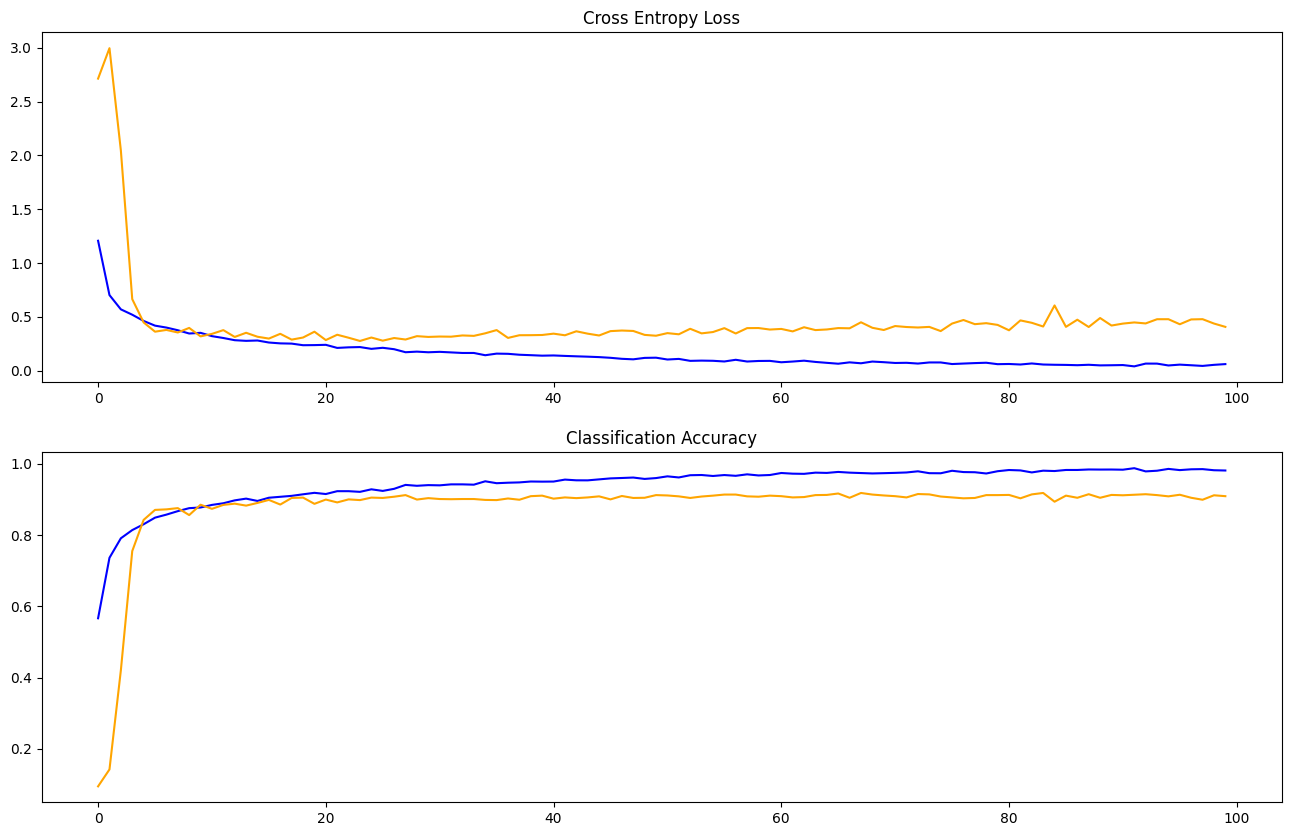

In [24]:
run_test_harness(model3, 100)

## **Finalization, saving of model, and testing on new images**

In [25]:
trainX, valX, testX, trainY, valY, testY = prep_pixels(train_X, val_X, test_X, train_Y, val_Y, test_Y)

In [27]:
model3.save('/content/drive/MyDrive/Dataset/saved_fashion.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
model = load_model('/content/drive/MyDrive/Dataset/saved_fashion.h5')
# evaluate model on test dataset
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 90.193


In [33]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
  img = Image.open(filename).resize((224, 224))
  plt.imshow(img)
  plt.show()
  img = load_img(filename, target_size=(28, 28))
  img = img_to_array(img)
  img = img[:,:,0]
  img = img.reshape(1,28, 28, 1)
  img = img.astype('float32')
  img = img / 255.0
  return img

def run_example(filename):
  img = load_image(filename)
  model = load_model('/content/drive/MyDrive/Dataset/saved_fashion.h5')
  result = np.argmax(model.predict(img), axis=1)
  if result == 0:
    print('Tshirt')
  elif result == 1:
    print('Top')
  elif result == 2:
    print('Pullover')
  elif result == 3:
    print('Dress')
  elif result == 4:
    print('Coat')
  elif result == 5:
    print('Sandal')
  elif result == 6:
    print('Shirt')
  elif result == 7:
    print('Snicker')
  elif result == 8:
    print('Bag')
  else:
    print('Ankle Boot')

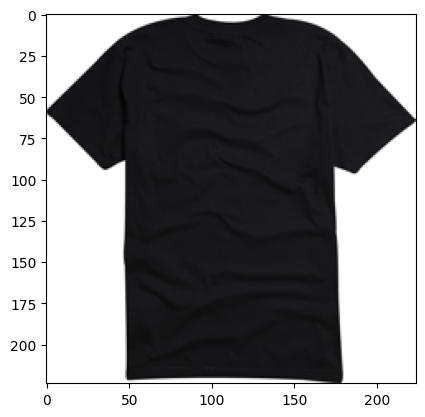

1/1 [==============================] - 0s 336ms/step
Pullover


In [40]:
run_example('/content/drive/MyDrive/Colab Notebooks/Shirt.jpg')